In [1]:
"""!pip install torch torchvision torchaudio
!pip install easyocr
!pip install imutils
!pip install pillow"""

'!pip install torch torchvision torchaudio\n!pip install easyocr\n!pip install imutils\n!pip install pillow'

In [2]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr 
import tkinter as tk
from tkinter import PhotoImage
from tkinter import filedialog
from tkinter.filedialog import askopenfile
from tkinter import Tk, Label, Button
from PIL import Image, ImageTk

In [3]:
states = {"AN": "Andaman and Nicobar Islands", "AP": 'Andhra Pradesh', 'AR':'Arunachal Pradesh', 'AS': 'Assam', 'BR':'Bihar',
         'CH':'Chandigarh', "CG":'Chhattisgarh', "DD":'Dadra and Nagar Haveli and Daman and Diu', 'DL':'Delhi', "GA":"Goa",
         "GJ":"Gujarat","HR":"Haryana","HP":"Himachal Pradesh","JK":"Jammu and Kashmir","JH":"Jharkhand","KA":"Karnataka",
         "KL":"Kerala","LA":"Ladakh","LD":"Lakshadweep","MP":"Madhya Pradesh","MH":"Maharashtra","MN":"Manipur","ML":"Meghalaya",
         "MZ":"Mizoram","NL":"Nagaland","OD":"Odisha","PY":"Puducherry","PB":"Punjab","RJ":"Rajasthan","SK":"Sikkim","TN":"Tamil Nadu",
         "TG":"Telangana","TR":"Tripura","UP":"Uttar Pradesh","UK":"Uttarakhand","WB":"West Bengal", 'OT':'Other territory'}
expired_states = {'DN':'Dadra and Nagar Haveli','UA': 'Uttarakhand', "TS":'Telangana', 'OR':'Odissa'}

Exception in Tkinter callback
Traceback (most recent call last):
  File "/Users/ruhi/anaconda3/lib/python3.11/tkinter/__init__.py", line 1948, in __call__
    return self.func(*args)
           ^^^^^^^^^^^^^^^^
  File "/var/folders/0h/095sjzjj267grrjmzh6v5y_c0000gq/T/ipykernel_13866/4029892026.py", line 44, in clicked
    new_image = cv2.drawContours(mask, [location], 0,255, -1)
                ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
cv2.error: OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/drawing.cpp:2632: error: (-215:Assertion failed) reader.ptr != NULL in function 'cvDrawContours'

Exception in Tkinter callback
Traceback (most recent call last):
  File "/Users/ruhi/anaconda3/lib/python3.11/tkinter/__init__.py", line 1948, in __call__
    return self.func(*args)
           ^^^^^^^^^^^^^^^^
  File "/var/folders/0h/095sjzjj267grrjmzh6v5y_c0000gq/T/ipykernel_13866/4029892026.py", line 44, in clicked
    new_image = 

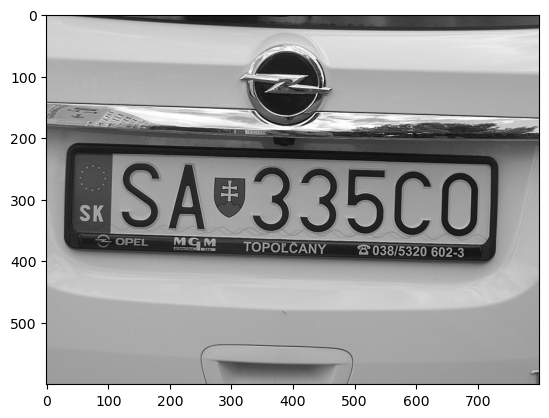

In [4]:
my_w = tk.Tk()
my_w.geometry("900x700")
my_w.title('Indian License Plate Detector')
my_font1=('Arial', 20, 'bold')

IMG = None

def upload_file():
    f_types = [('Jpg Files', '*.jpg')]
    filename = filedialog.askopenfilename(filetypes=f_types)
    resizeimage = Image.open(filename)
    width, height = resizeimage.size
    zoom = 300/height
    pixels_x, pixels_y = tuple([int(zoom * x)  for x in resizeimage.size])
    img = ImageTk.PhotoImage(resizeimage.resize((pixels_x, pixels_y))) 
    l2 = Label(my_w, image=img)
    l2.image = img
    l2.grid(row=5,column=1)
    global IMG
    IMG = filename

def clicked():
    global IMG
    if IMG == None:
        upload_pls = Label(my_w, text = "Please upload an image first.")
        upload_pls.grid(row=7, column = 1)
    else: 
        img = IMG
        img = cv2.imread(img)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))
        bfilter = cv2.bilateralFilter (gray, 11, 17, 17)
        edged = cv2.Canny(bfilter, 30, 200)
        keypoints = cv2.findContours (edged. copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
        contours = imutils.grab_contours (keypoints)
        contours = sorted(contours, key=cv2.contourArea, reverse=True) [:10]
        location = None
        for contour in contours:
            approx = cv2.approxPolyDP(contour, 10, True)
            if len(approx) == 4:
                location = approx
                break
        mask = np.zeros(gray.shape, np.uint8)
        new_image = cv2.drawContours(mask, [location], 0,255, -1)
        new_image = cv2.bitwise_and(img, img, mask=mask)
        (x,y) = np.where(mask==255)
        (x1, y1) = (np.min(x), np.min(y))
        (x2, y2) = (np.max(x), np.max(y))
        cropped_image = gray[x1:x2+1, y1:y2+1]
        reader = easyocr.Reader (['en'])
        result = reader.readtext (cropped_image)
        result
        teext = result[0][-2]
        licensed_state = teext[:2].upper()

        detected_plate = Label(my_w, text =("The license plate detected is", teext + "."), font = ("Arial", 20))
        detected_plate.grid(row=7,column=1)
        if licensed_state in states:
            for i in states:
                if licensed_state == i:
                    licensed_state = states[i]
                    licensed_plate = Label(my_w, text = ("This license plate was registered in", licensed_state+"."), font = ("Arial", 20))
                    licensed_plate.grid(row=8,column=1)
                    break
        elif licensed_state in expired_states:
            if licensed_state not in states:
                for j in expired_states:
                    if licensed_state == j:
                        licensed_state = expired_states[j]
                        expired_plate = Label(my_w, text = ("This license plate was registered in", licensed_state+"."), font = ("Arial", 20))
                        b2.grid(row=8,column=1)
                        break
        else:
            undetected = Label(my_w, text = "The detected license plate cannot be matched to any state code of India. This may occur because: \n 1. The license plate is not Indian. \n 2. The license plate is that of a special entity, such as the Foreign Missions or Armed Indian Forces. \n 3. The license plate was registered before 2009. \n4. The license plate is not registered under any state \n but is part of the Bharat series. This is indicated by a 'BH' occupying the \n 3rd and 4th characters of the license plate."
                              , font = ("Arial", 20))
            undetected.grid(row=8,column=1)


title = Label(my_w, text='Indian License Plate Detector', font =("Arial Bold",30))
title.grid(row=1, column = 1)

desc = Label(my_w, text=('Welcome to the Indian License Plate Detector!'+' Upload a file of a vehicle and the license plate \n will be detected. \n The state in which the vehicle was registered will also be revealed.'), font =("Arial Bold",20))
desc.grid(row=2, column = 1)

b1 = tk.Button(my_w, text='Upload .jpg file', 
   command = lambda:upload_file(), font =("Arial Bold", 20))
b1.grid(row=4,column=1) 
b2= Button(my_w,text = "Find plate number", command = clicked, font = ("Arial Bold", 20))
b2.grid(row=6,column=1)


my_w.mainloop()